In [18]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [19]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [5 3 5 7 6 0 0 3 8 0]


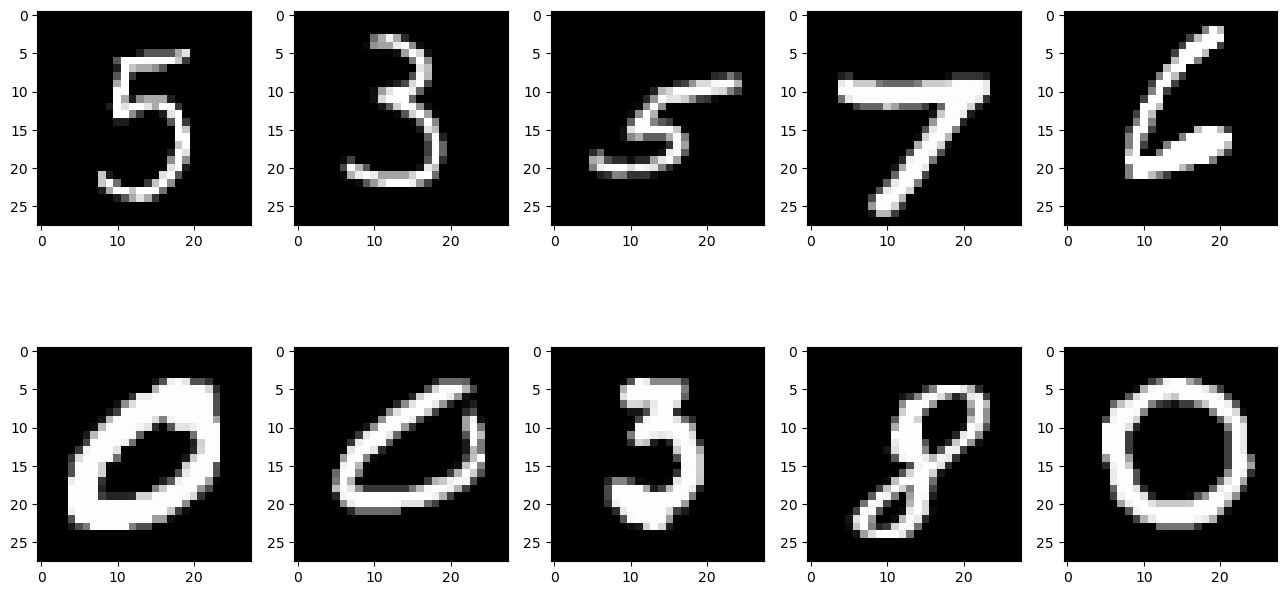

In [20]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [21]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [29]:
from tensorflow.keras import regularizers

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [31]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8229 - loss: 1.3731
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9197 - loss: 0.6318
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9284 - loss: 0.5534
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9337 - loss: 0.5080
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9365 - loss: 0.4779
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9395 - loss: 0.4527
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9417 - loss: 0.4331
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9426 - loss: 0.4190
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9462 - loss: 0.4042
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9447 - loss: 0.3989


Plot the loss and accuracy graphs

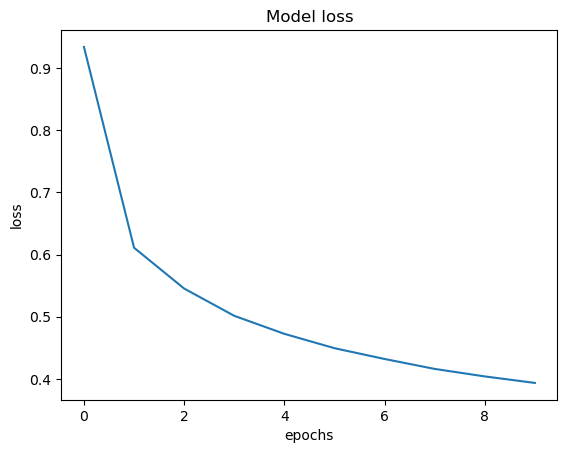

In [32]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

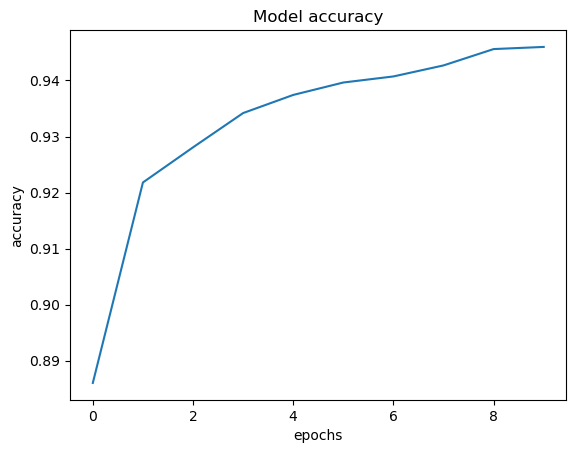

In [33]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [34]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9361 - loss: 0.4238  
Loss of the Test dataset is: 0.4005322754383087
Accuracy of the test dataset is: 0.9435999989509583


Save the model weights

In [38]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9361 - loss: 0.4238
Loss of the Test dataset is: 0.4005322754383087
Accuracy of the test dataset is: 0.9435999989509583
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


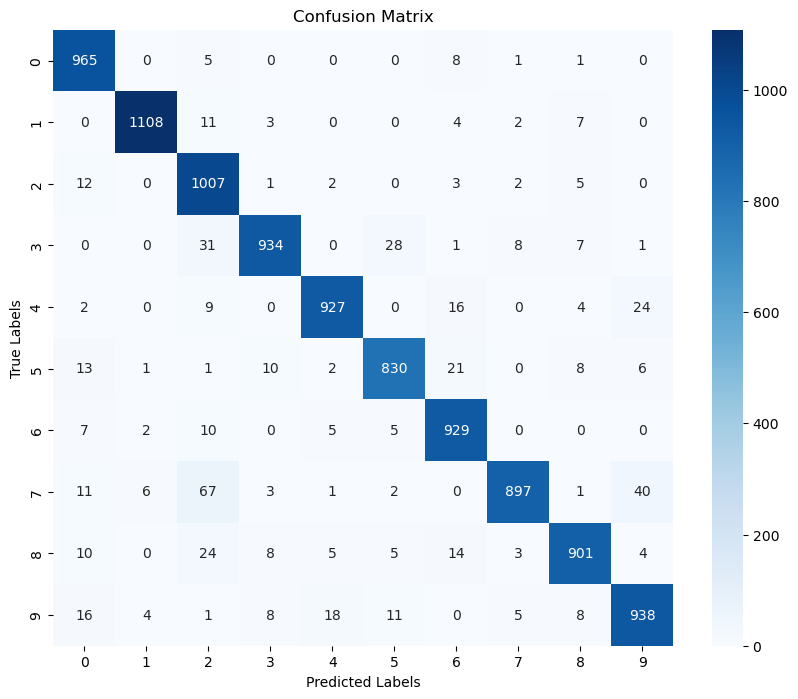

In [41]:
import seaborn as sns

loss, acc = model.evaluate(new_test_data, new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

predictions = model.predict(new_test_data)
predicted_labels = np.argmax(predictions, axis=1)


conf_matrix = confusion_matrix(test_target, predicted_labels)


plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()